# Creating a PyBaMM Model

In this notebook, we create and simulate a single particle model (SPM). This is achieved using a predefined set of parameter values introduced in Marquis et al. [[1]](https://doi.org/10.1149/1945-7111/abbce4).

### Setting up the Environment

If you don't already have PyBOP installed, check out the [installation guide](https://pybop-docs.readthedocs.io/en/latest/installation.html) first.

We begin by importing the necessary libraries.

In [ ]:
import pybamm

import pybop

pybop.plot.PlotlyManager().pio.renderers.default = "notebook_connected"

PyBOP offers parameter inference and design optimisation using both empirical and physics-based forward models provided by PyBaMM.

Let's construct the parameter values and then the single-particle model (SPM). Once that is done, we can create a PyBaMM simulation.

In [ ]:
parameter_values = pybamm.ParameterValues("Marquis2019")
model = pybamm.lithium_ion.SPM()

sim = pybamm.Simulation(model, parameter_values=parameter_values)

/home/nicola/GitHub/PyBOP/.nox/notebooks-overwrite/lib/python3.12/site-packages/pybamm/simulation.py:122: UserWarning:

The default solver changed to IDAKLUSolver after the v25.4.0. release. You can swap back to the previous default by using `pybamm.CasadiSolver()` instead.



## Testing the model

Having constructed the simulation, we can now solve it over a time interval specified by `t_eval`. By default, a constant discharge current is applied. Let's have a look at the voltage discharge curve predicted by the model to verify that it is working. As we are only working with the forward model, PyBaMM plotting methods will be used; however, when performing parameter inference or design optimisation, PyBOP plotting methods are recommended.

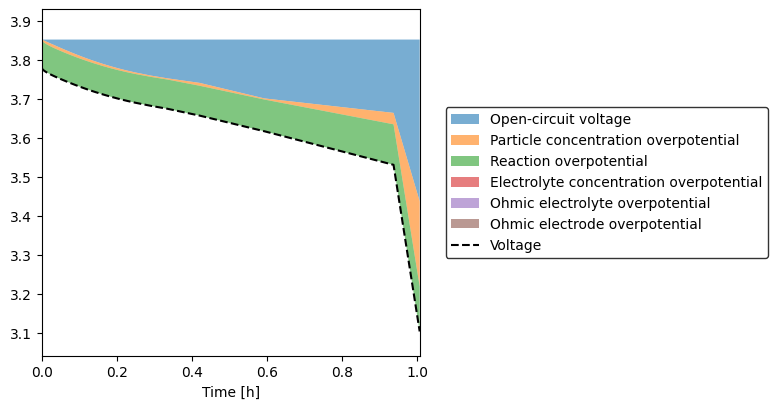

(<Figure size 800x400 with 1 Axes>, <Axes: xlabel='Time [h]'>)

In [ ]:
solution = sim.solve(t_eval=[0, 3700])

solution.plot_voltage_components()